<a href="https://colab.research.google.com/github/veapasichnyk/Codveda-Internship-/blob/main/Task_2_Build_a_Simple_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Task 2: Build a Simple Linear Regression Model

###Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

###Load a dataset

In [27]:
df = pd.read_csv("house Prediction Data Set.csv", sep='\s+', engine="python", header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-319096111.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("house Prediction Data Set.csv", sep='\s+', engine="python", header=None)


In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [29]:
df.columns = [
    'CRIM',     # per capita crime rate by town
    'ZN',       # proportion of residential land zoned for lots over 25,000 sq.ft.
    'INDUS',    # proportion of non-retail business acres per town
    'CHAS',     # dummy variable (= 1 if tract bounds Charles River, 0 otherwise)
    'NOX',      # nitric oxides concentration (parts per 10 million)
    'RM',       # average number of rooms per dwelling
    'AGE',      # proportion of owner-occupied units built before 1940
    'DIS',      # weighted distances to five Boston employment centers
    'RAD',      # index of accessibility to radial highways
    'TAX',      # full-value property-tax rate per $10,000
    'PTRATIO',  # pupil–teacher ratio by town
    'B',        # 1000(Bk - 0.63)^2 where Bk is the proportion of Black residents
    'LSTAT',    # % lower status of the population
    'MEDV'      # **target variable**: median value of owner-occupied homes in $1000s
]

In [30]:
print(df.shape)
print(df.info())

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


###Select features and target

In [31]:
# Features & Target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

###Split into train/test sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###Train `LinearRegression` model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

###Interpret coefficients

In [34]:
coeffs = pd.Series(model.coef_, index=X.columns)
print("Intercept:", model.intercept_)
print("\nCoefficients:")
print(coeffs)

Intercept: 30.24675099392366

Coefficients:
CRIM       -0.113056
ZN          0.030110
INDUS       0.040381
CHAS        2.784438
NOX       -17.202633
RM          4.438835
AGE        -0.006296
DIS        -1.447865
RAD         0.262430
TAX        -0.010647
PTRATIO    -0.915456
B           0.012351
LSTAT      -0.508571
dtype: float64


###Predict and evaluate

In [35]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"\nR² score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


R² score: 0.6688
Mean Squared Error: 24.2911


1. R² Score = 0.6688

- This means the model explains about 66.9% of the variance in the target variable MEDV (Median home value).

- While this is moderate performance, there's still ~33% of variance unexplained, which suggests: room for model improvement, possibly missing features or non-linear patterns not captured by a simple linear model.

2. MSE = 24.29

On average, the squared difference between actual and predicted home prices is ~24.29 (thousands of dollars).

###Visualize Predictions vs True

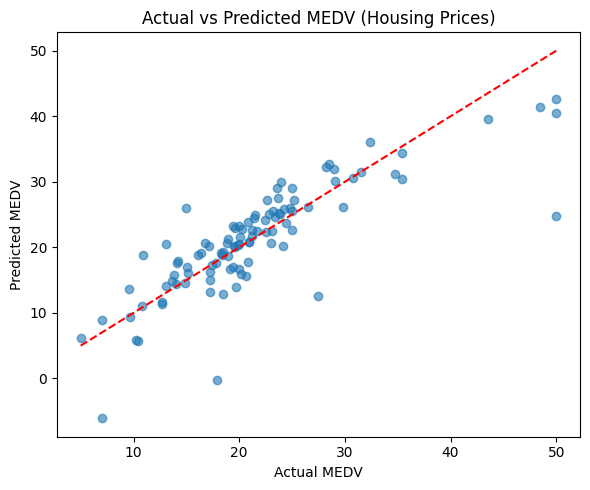

In [36]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual vs Predicted MEDV (Housing Prices)")
plt.tight_layout()
plt.show()

Points mostly cluster around the red dashed line (which represents a perfect prediction: Predicted = Actual).

This indicates that the model is making reasonable predictions across most of the price range.